<a href="https://colab.research.google.com/github/AlexanderVerheecke/TwitterSentimentAnalysis/blob/main/German_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to run:
The dataset used in this colab file is taken from my personal google Drive folder. I was unable to link the gitlab file to here. If the system is not connected to my Google Drive folder, the user will need to download the 
datasets themselves from : https://drive.google.com/drive/folders/1hxBtAXu-IfoajBtJIG_8q7lFcmcLWYJu?usp=sharing 

- DAI data: DAI TU Berlin -> de_sentiment_UNIQUE.csv
- German: OwnTweets -> German -> latestGerman.csv
- German translation: OwnTweets -> German -> latestEnglishTranslatedToGERMAN.csv


Further, since traiing the model will take a long time, it was saved andnloaded in for easier performance checking. The model can be loaded from:
https://drive.google.com/drive/folders/1Yj06VqsfPMaTlfnJEdInLKYXmd4c7nch?usp=sharing

The model to load is USE_GER_LSTM_OOV. The path to the model should be inserted under "RESULTS TO COMPARE" as:


```
LOADED_GER_LSTM_OOV = tf.keras.models.load_model('USE_GER_LSTM_OOV')
```

The dataset and model will need to be uploaded to Colabs files folder on left and the file path copied to the respective dataset reading.

Once the dataset is imported correctly, the user will need to run the following cells in order to run the code.
- cells under IMPORT
- cells under DATA CLEANING FUNCTION
- cells under DATA READING AND CLEANING
- ALL the cells under MODEL PERFORMANCE WITH LOADED MODEL

If the user wants to also train the model again, they will simply need to 'run all' under 'runtime'.


# IMPORT

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA CLEANING FUNCTION

In [2]:
import re
import nltk
from nltk.stem.cistem import Cistem
from nltk.stem import *
from nltk.stem.porter import *

from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import TweetTokenizer 

tweet_tokenizer = TweetTokenizer()
stemmer_ENG = PorterStemmer()
stemmer_GER = Cistem()


LINKS = "http\S+"
USERNAMES = "@\S+"
CONSECUTIVE = '[.]{2,}'
NON_ALPHA = '(?:(?<=^)|(?<=\s))(\d+[.,]*)+(?=$|\s)'
HASHTAG = '#'
RT = 'rt'
SYMBOLS = '[^\w& ]+'


def tweet_to_words_GER(text):
    text = text.lower() # Convert to lower case
    text = re.sub(LINKS, "XXXLINKXXX", text) # Replace links with token
    text = re.sub(USERNAMES, "XXXUSERNAMEXXX", text) # Replace mentions with token
    text = re.sub(CONSECUTIVE, ' ... ', text) # Unify consecutive periods
    text = re.sub(NON_ALPHA, "", text) # Remove all numbers not being part of alphanumeric word
    text = re.sub(HASHTAG, "", text) # Remove '#' in front of hashtags
    text = re.sub(RT, "", text) # Remove 'RT'
    text = re.sub(SYMBOLS, " ", text) # removes symbols
    text = text.lower()

    # words = tweet_tokenizer.tokenize(text)
    # words = [w for w in words if w not in stopwords.words("german")] # Remove stopwords
    # words = [stemmer_GER.stem(w) for w in words] # Stem
    
    return text


def tweet_to_words_ENG(text):
    text = text.lower() # Convert to lower case
    # text = expand(text) #expands contractions
    text = re.sub(LINKS, "XXXLINKXXX", text) # Replace links with token
    text = re.sub(USERNAMES, "XXXUSERNAMEXXX", text) # Replace mentions with token
    text = re.sub(CONSECUTIVE, ' ... ', text) # Unify consecutive periods
    text = re.sub(NON_ALPHA, "", text) # Remove all numbers not being part of alphanumeric word
    text = re.sub(HASHTAG, "", text) # Remove '#' in front of hashtags
    text = re.sub(RT, "", text) # Remove 'RT'
    text = re.sub(SYMBOLS, " ", text) # removes symbols
    text = text.lower()
    # words = tweet_tokenizer.tokenize(text)
    # words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    # words = [stemmer_ENG.stem(w) for w in words] # Stem
    # words = " ".join(words).lower()

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# DATA READING AND CLEANING

In [3]:
DAI = pd.read_csv('/content/drive/MyDrive/Education/University/Master/Classes/Thesis/Data/DAI TU Berlin/de_sentiment_UNIQUE.csv')
DAI = pd.DataFrame(DAI)

German = pd.read_csv('/content/drive/MyDrive/Education/University/Master/Classes/Thesis/Data/OwnTweets/German/latestGerman.csv')
German = pd.DataFrame(German)

German_translation = pd.read_csv('/content/drive/MyDrive/Education/University/Master/Classes/Thesis/Data/OwnTweets/German/latestEnglishTranslatedToGERMAN.csv')
German_translation = pd.DataFrame(German_translation)

German = German[['Sentiment', 'Tweet']]
DAI = DAI[['Sentiment', 'Tweet']]
German_translation = German_translation[['Sentiment', 'Tweet']]
pd.set_option('display.max_colwidth', None)

DAI['clean'] = DAI["Tweet"].apply(tweet_to_words_ENG)
German['clean'] = German['Tweet'].apply(tweet_to_words_ENG)
German_translation['clean'] = German_translation['Tweet'].apply(tweet_to_words_ENG)

maps = {-1: "negative", 0:"neutral", 1:"positive"}
DAI['Sentiment'] = DAI['Sentiment'].map(maps)
German['Sentiment'] = German['Sentiment'].map(maps)
German_translation['Sentiment'] = German_translation['Sentiment'].map(maps)

In [ ]:
German

,Sentiment,Tweet,clean
0,neutral,@Marcel126610 Irgendwie schon. Aber ...wer will ihn denn dann auch irgendwo rumsitzen haben...🤷‍♀️,xxxusernamexxx irgendwie schon aber wer will ihn denn dann auch irgendwo rumsitzen haben
1,neutral,@PewPeeew aight nichts leichter als das,xxxusernamexxx aight nichts leichter als das
2,negative,"@LibertyHannes @RikeWaldfee @MarcoBuschmann Uhhhhh echt jetzt "" ich darf töten wenn ich will"" mimimi 😭 und was mit euren Blagen ist, ist mir doch egal. Puh was ich dazu sage #FDPmachtkrankundarm und #FDPunter5Prozent . Ihr seit auf einen guten Weg . 😂 Ach #dielinke erholt sich gerade in den ersten Umfragen wider. 😂",xxxusernamexxx xxxusernamexxx xxxusernamexxx uhhhhh echt jetzt ich darf töten wenn ich will mimimi und was mit euren blagen ist ist mir doch egal puh was ich dazu sage fdpmachtkrankundarm und fdpunter5prozent ihr seit auf einen guten weg ach dielinke erholt sich gerade in den ersten umfragen wider
3,neutral,"Unter #IhrHabtEuchSelbstAusgegrenzt meinte gerade ein Querdenker, es sollte doch konsequenzlos möglich sein sich nicht impfen zu lassen. Tja was soll ich sagen: Für Pfleger und Ärzte am Ende ihrer Kräfte war es auch nicht konsequenzlos, wenn Querdenker die Impfung verweigern.",unter ihrhabteuchselbstausgegrenzt meinte gerade ein querdenker es sollte doch konsequenzlos möglich sein sich nicht impfen zu lassen tja was soll ich sagen für pfleger und ärzte am ende ihrer kräfte war es auch nicht konsequenzlos wenn querdenker die impfung verweigern
4,neutral,"Und zur Sicherheit noch einmal: es geht hier um die Etikettierung, nicht das Testprodukt selbst. Kein Einfluss auf Ergebnis. https://t.co/Nne9nYSPgV",und zur sicherheit noch einmal es geht hier um die etikettierung nicht das testprodukt selbst kein einfluss auf ergebnis xxxlinkxxx
...,...,...,...
941,neutral,Ich würde es denn Blauen von ganzem Herzen gönnen. Trotz meiner Liebe zum #VfB #SVKSGF,ich würde es denn blauen von ganzem herzen gönnen trotz meiner liebe zum vfb svksgf
942,negative,"Nicht, dass sich Querpfosten jemals irgend einer Nähe zu der uns alle umgebenden Realität schuldig gemacht hätten, aber dennoch: GEGEN WELCHE CORONA-MAẞNAHNEN DEMONSTRIEREN DIE ZUM FICK DIE SIND DOCH ALLE ABGESCHAFFT!! https://t.co/OSnrFkr2EW",nicht dass sich querpfosten jemals irgend einer nähe zu der uns alle umgebenden realität schuldig gemacht hätten aber dennoch gegen welche corona maßnahnen demonstrieren die zum fick die sind doch alle abgeschafft xxxlinkxxx
943,neutral,@Tob_Sch Die ständige Angst sich anzustecken. Die sozial und emotional sehr herausfordernden SuS. Die mangelnde Solidarität in der Gesellschaft.,xxxusernamexxx die ständige angst sich anzustecken die sozial und emotional sehr herausfordernden sus die mangelnde solidarität in der gesellschaft
944,neutral,@kopfkaputt0 Für dich werde ich zu ner zaziki soße,xxxusernamexxx für dich werde ich zu ner zaziki soße


In [ ]:
German_translation

,Sentiment,Tweet,clean
0,negative,"Wenn du ein Ex-Drama hast, schlag mich bitte nicht an ✌🏽",wenn du ein ex drama hast schlag mich bitte nicht an
1,neutral,"Wenn die Weltbank die Menschen unterstützen will, muss sie #Äthiopien dazu drängen, #TigraySiege zu beenden und ungehinderten humanitären Zugang zu #Tigray zu ermöglichen. #WorldBankStopFundingTigrayGenocide @SecBlinken @JosepBorrellF @WorldBank @UN_HRC @DavidMalpassWBG @IMFNews",wenn die weltbank die menschen unterstützen will muss sie äthiopien dazu drängen tigraysiege zu beenden und ungehindeen humanitären zugang zu tigray zu ermöglichen worldbankstopfundingtigraygenocide xxxusernamexxx xxxusernamexxx xxxusernamexxx xxxusernamexxx xxxusernamexxx xxxusernamexxx
2,positive,"Amusan und Duplantis, zwei Athleten, die bei Oregon 22 Rekorde gebrochen haben – https://t.co/z4ry6UPGgm",amusan und duplantis zwei athleten die bei oregon rekorde gebrochen haben xxxlinkxxx
3,neutral,FAKT https://t.co/0ZJlCLlytP,fakt xxxlinkxxx
4,neutral,220726 © 时间先生Esquire — ESQUIRE China teilt ein Teaser-Bild von Wu Lei auf dem kommenden Cover der August-Ausgabe von ESQUIRE! #吴磊 • #wulei • #leowu • #우飮書信 ࿐ https://t.co/lbm2HKv0Df,时间先生esquire esquire china teilt ein teaser bild von wu lei auf dem kommenden cover der august ausgabe von esquire 吴磊 wulei leowu 우飮書信 xxxlinkxxx
...,...,...,...
973,neutral,220727 🐹💬 UPDATE „hu“,update hu
974,neutral,"@goldkorn Ich wünschte, ich spreche fließend Spanisch und nicht Chinesisch. Wäre nützlicher",xxxusernamexxx ich wünschte ich spreche fließend spanisch und nicht chinesisch wäre nützlicher
975,neutral,"So sehr mir diese Streiks den Samstag erschweren, ich unterstütze die Streiks trotzdem ✊🏼",so sehr mir diese streiks den samstag erschweren ich unterstütze die streiks trotzdem
976,neutral,"@FredUnbound Lamm und sogar Ziege sind in den USA kein wichtiges Fleisch, was im Gegensatz zum Rest der ganzen Welt steht.",xxxusernamexxx lamm und sogar ziege sind in den usa kein wichtiges fleisch was im gegensatz zum rest der ganzen welt steht


# DATA SHAPING FOR MODEL INPUT

1. fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
2. texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

Why don't combine them? Because you almost always fit once and convert to sequences many times. You will fit on your training corpus once and use that exact same word_index dictionary at train / eval / testing / prediction time to convert actual text into sequences to feed them to the network. So it makes sense to keep those methods separate.

In [ ]:
# # The maximum number of words to be used. (most frequent)
FREQUENT_WORDS_COUNT = 5500
# # Max number of words for the padding -> max length tweet 280 chars ~60 words, also best results after experimenting
SEQUENCE_LENGTH_COUNT =60
# Specify the dimension of each token's vector.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=FREQUENT_WORDS_COUNT, lower=True, oov_token="<OOV>")
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(DAI["Tweet"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7112 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(DAI["Tweet"].values)
X = pad_sequences(X, maxlen=SEQUENCE_LENGTH_COUNT)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1781, 60)


In [ ]:
shape =DAI['Sentiment'].values.shape
print(shape)

(1781,)


In [ ]:
Y = pd.get_dummies(DAI['Sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1781, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1335, 60) (1335, 3)
(446, 60) (446, 3)


# MODEL CREATION


In [ ]:
GER_LSTM_OOV = Sequential()
GER_LSTM_OOV.add(Embedding(FREQUENT_WORDS_COUNT, EMBEDDING_DIM, input_length=X.shape[1]))
GER_LSTM_OOV.add(SpatialDropout1D(0.2))
GER_LSTM_OOV.add(LSTM(100, dropout=0.2,recurrent_dropout=0.2))
GER_LSTM_OOV.add(Dense(3, activation='softmax'))
GER_LSTM_OOV.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(GER_LSTM_OOV.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           550000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 630,703
Trainable params: 630,703
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# tf.keras.backend.clear_session()

epochs = 3
batch_size = 32

history = GER_LSTM_OOV.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/3
38/38 [==============================] - 19s 379ms/step - loss: 0.9301 - accuracy: 0.6228 - val_loss: 0.8781 - val_accuracy: 0.6493
Epoch 2/3
38/38 [==============================] - 12s 306ms/step - loss: 0.8410 - accuracy: 0.6353 - val_loss: 0.8162 - val_accuracy: 0.6493
Epoch 3/3
38/38 [==============================] - 12s 306ms/step - loss: 0.6626 - accuracy: 0.7236 - val_loss: 0.8430 - val_accuracy: 0.6119


In [ ]:
accr = GER_LSTM_OOV.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


14/14 [==============================] - 0s 25ms/step - loss: 0.8442 - accuracy: 0.6480
Test set
  Loss: 0.844
  Accuracy: 0.648


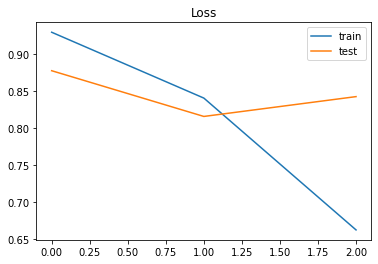

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

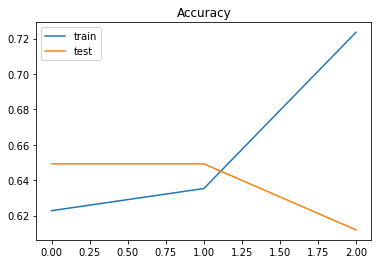

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
# GER_LSTM_OOV.save('/content/drive/MyDrive/Education/University/Master/Classes/Thesis/Models/USE_GER_LSTM_OOV')

# ==== MODEL PERFORMANCE WITH LOADED MODEL ====

# PREDICTION FUNCTION AND CLASSIFICATION REPORT

The following are function which will be used in the end for sentiment prediction.

1. FREQUENT_WORDS_COUNT = 5500
2. SEQUENCE_LENGTH_COUNT = 60

- *prepare_tokenizer_new_input()* : uses FREQUENT_WORDS_COUNT, SEQUENCE_LENGTH_COUNT, and a train dataset to create a tokenizer on which later test data will be fit for sequence and padding 

- get_results_tweet/clean(): takes as parameters the test dataframe with ["Tweet'], a loaded model, and the tokenizer created with prepare_tokenizer_new_input(). 





In [4]:
# # The maximum number of words to be used. (most frequent)
FREQUENT_WORDS_COUNT = 5500
# # Max number of words for the padding -> max length tweet 280 chars ~60 words, also best results after experimenting
SEQUENCE_LENGTH_COUNT =60



def prepare_tokenizer_new_input(frequent, sequence_length, train_data):
  tokenizer = Tokenizer(num_words=frequent, lower=True, oov_token="<OOV>")
  tokenizer.fit_on_texts(train_data["Tweet"].values)

  return tokenizer
  # sequence = tokenizer.texts_to_sequences(train_data["Tweet"].values)
  # pads = pad_sequences(sequence, maxlen=sequence_length)


# def get_results_tweet(dataframe, model):

def get_results_tweet(dataframe, model, tokenizer):

  # #converting dataframe.tweet to an array to be then convertied into an array of arrays so can iterate over each element and get the sentimetn
  array_Tweet = dataframe['Tweet']

  predictions_Tweet = []
  for tweet in array_Tweet:
    # print(tweet)
    tweet = [tweet]
    seq = tokenizer.texts_to_sequences(tweet)
    padded = pad_sequences(seq, maxlen=SEQUENCE_LENGTH_COUNT)
    pred = model.predict(padded)
    # print("Pred: ", pred)
    # print("argmax: ", (np.argmax(pred)))
    string = ""
    labels = ['negative', 'neutral', 'positive']
    if(np.argmax(pred) == 0):
      # print("negative")
      predictions_Tweet.append('negative')
    elif(np.argmax(pred) == 1):
      # print("neutral")
      predictions_Tweet.append('neutral')
    elif (np.argmax(pred) == 2):
      # print("positive")
      predictions_Tweet.append('positive')

    # pred = set(predictions_Tweet)
    # act = set(dataframe['Sentiment'][:100].values)

  return classification_report(dataframe['Sentiment'].values, predictions_Tweet)
                                 
  # return result, act, pred


  # return classification_report(dataframe['Sentiment'][:100].values, predictions_Tweet), act, pred


def get_results_clean(dataframe, model, tokenizer):
  # #comverting english.tweet to an array to be then convertied into an array of arrays so can iterate over each element and get the sentimetn
  array_Clean= dataframe['clean']
# array_germanClean = DAI['clean']

  predictions_Clean = []
  for tweet in array_Clean:
    # print(tweet)
    tweet = [tweet]
    seq = tokenizer.texts_to_sequences(tweet)
    padded = pad_sequences(seq, maxlen=SEQUENCE_LENGTH_COUNT)
    pred = model.predict(padded)
    # print("Pred: ", pred)
    string = ""
    labels = ['negative', 'neutral', 'positive']
    if(np.argmax(pred) == 0):
      # predictions_Clean("negative")
      predictions_Clean.append('negative')
    elif(np.argmax(pred) == 1):
      # print("neutral")
      predictions_Clean.append('neutral')
    elif (np.argmax(pred) == 2):
      # print("positive")
      predictions_Clean.append('positive')

  return classification_report(dataframe['Sentiment'].values, predictions_Clean)


# ================ MODEL LOADING =====================

The following section uses a German LSTM model whose training can be seen in the above section. In this section, we load in that same model and create a tokenizer with the exact same parameters and training set as was used to train the LSTM model. The tokenizer is created with the function "prepare_tokenzier_new_input()". Its receives as parameters:
 1. FREQUENT_WORDS_COUNT
 2. SEQUENCE_LENGTH_COUNT
 3. training set DAI.

Then a function "get_results_tweets()" is called to perform the prediction. The function receives as parameters:
1. test set (German)
2. the model (LOADED_GER_LSTM_OOV)
3. tokenizer (created by "prepare_tokenzier_new_input()")

In [8]:
from tensorflow import keras
import pandas as pd

LOADED_GER_LSTM_OOV = keras.models.load_model('/content/drive/MyDrive/Education/University/Master/Classes/Thesis/Models/ReportModels/USE_GER_LSTM_OOV')



In [ ]:
LOADED_GER_LSTM_OOV.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           550000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 630,703
Trainable params: 630,703
Non-trainable params: 0
_________________________________________________________________


In [9]:
# The maximum number of words to be used. (most frequent)
FREQUENT_WORDS_COUNT = 5500
# Max number of words for the padding -> max length tweet 280 chars ~60 words, also best results after experimenting
SEQUENCE_LENGTH_COUNT =60

tokenizer = prepare_tokenizer_new_input(FREQUENT_WORDS_COUNT, SEQUENCE_LENGTH_COUNT, DAI)


# RESULTS


In [10]:
print(get_results_tweet(German, LOADED_GER_LSTM_OOV, tokenizer))


              precision    recall  f1-score   support

    negative       0.29      0.14      0.18       132
     neutral       0.80      0.87      0.84       735
    positive       0.19      0.19      0.19        79

    accuracy                           0.71       946
   macro avg       0.42      0.40      0.40       946
weighted avg       0.68      0.71      0.69       946



In [11]:
print(get_results_tweet(German_translation, LOADED_GER_LSTM_OOV, tokenizer))


              precision    recall  f1-score   support

    negative       0.32      0.10      0.15       132
     neutral       0.72      0.92      0.81       679
    positive       0.40      0.17      0.24       167

    accuracy                           0.68       978
   macro avg       0.48      0.40      0.40       978
weighted avg       0.61      0.68      0.62       978



In [12]:
print(get_results_clean(German, LOADED_GER_LSTM_OOV, tokenizer))


              precision    recall  f1-score   support

    negative       0.24      0.13      0.17       132
     neutral       0.80      0.83      0.82       735
    positive       0.15      0.22      0.18        79

    accuracy                           0.68       946
   macro avg       0.40      0.39      0.39       946
weighted avg       0.67      0.68      0.67       946



In [13]:
print(get_results_clean(German_translation, LOADED_GER_LSTM_OOV, tokenizer))


              precision    recall  f1-score   support

    negative       0.30      0.11      0.16       132
     neutral       0.73      0.86      0.79       679
    positive       0.35      0.29      0.32       167

    accuracy                           0.66       978
   macro avg       0.46      0.42      0.42       978
weighted avg       0.61      0.66      0.62       978

